<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercises" data-toc-modified-id="Exercises-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercises</a></span></li></ul></div>

# Exercises

In [1]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
# Load the data
data = pd.read_csv('micro_world.csv', engine='python')

In [4]:
# Filter the data
philippine_data = data[
    data['economy']=='Philippines'
]

**INSTRUCTIONS**

1. Create candidate variables for clustering. For now, let’s use categorical variables in clustering. Please make sure that your features make sense!
2. Apply K-Modes clustering and profile each cluster.
3. Using the cluster profile, what specific policy recommendations can we do in line with our aim to democratize access to financial services?


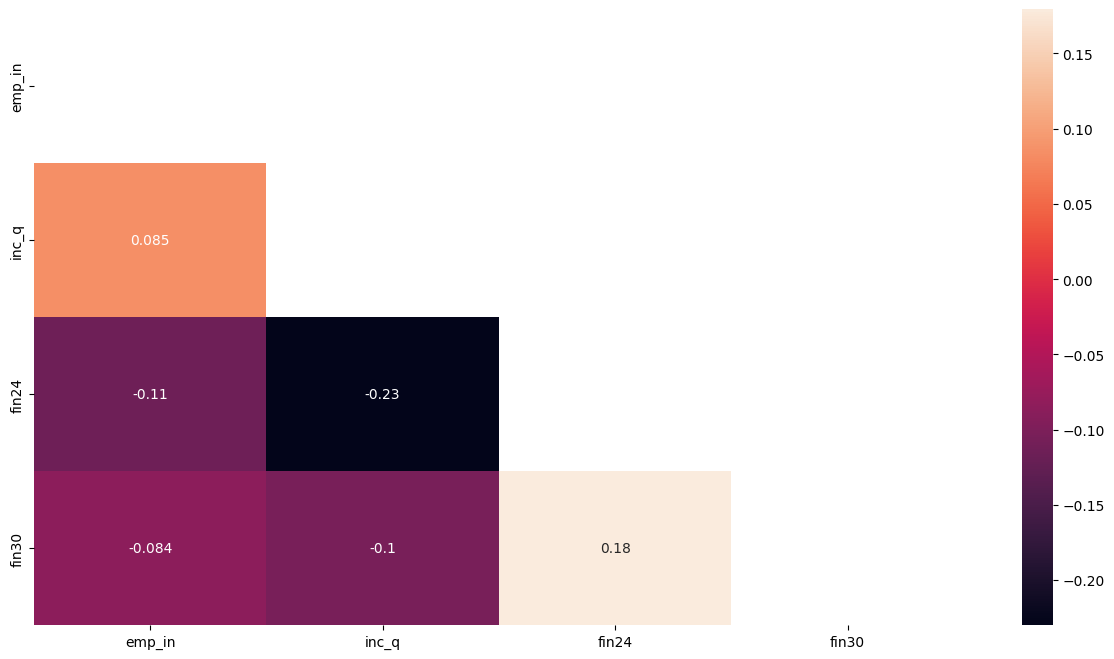

In [5]:
columns = ["emp_in", "inc_q", "fin24", "fin30"]
corr = data[columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, mask=mask, annot=True)

In [6]:
# Filter data
cluster_data = philippine_data[columns]

In [7]:
# Show data
cluster_data.columns

Index(['emp_in', 'inc_q', 'fin24', 'fin30'], dtype='object')

In [8]:
# Create dictionaries for mapping
employment_mapping = {
    0: 'no',
    1: 'yes'
}

income_group_mapping = {
    1:'poorest 20%',
    2:'second 20%',
    3:'middle 20%',
    4:'fourth 20%',
    5:'richest 20%'
}

emergency_fund_mapping = {
    1: 'possible',
    2: 'not possible'
}

utility_bill_mapping = {
    1: 'yes',
    2: 'no'
}

In [9]:
# Replace values using the mapping
cluster_data = cluster_data.replace(
    {
        'emp_in': employment_mapping,
        'inc_q': income_group_mapping,
        'fin24': emergency_fund_mapping,
        'fin30': utility_bill_mapping
     }
    )

In [10]:
cluster_data

,emp_in,inc_q,fin24,fin30
114292,no,poorest 20%,not possible,yes
114293,yes,richest 20%,possible,no
114294,yes,fourth 20%,not possible,yes
114295,yes,richest 20%,possible,yes
114296,yes,richest 20%,possible,yes
...,...,...,...,...
115287,yes,poorest 20%,possible,yes
115288,no,poorest 20%,not possible,no
115289,yes,fourth 20%,possible,no
115290,yes,fourth 20%,possible,yes


In [11]:
# Check nulls
cluster_data.isna().sum()

emp_in    0
inc_q     0
fin24     0
fin30     0
dtype: int64

In [12]:
# Rename columns
cluster_data = cluster_data.rename(
    columns = {
        'emp_in':'has_employed', 
        'inc_q':'income_group',
        'fin24': 'has possible emergency fund',
        'fin30': 'has paid utility bills'
        }
)

In [13]:
columns_now = ['has_employed', 'income_group', 'has possible emergency fund', 'has paid utility bills']

In [14]:
# Create clustering function
def run_kmodes(n_clusters=None, cluster_data=None):
  # Initialize clustering
  kmodes = KModes(
      init="random",
      n_clusters=n_clusters,
      random_state=42
      )
  
  # Apply clustering to the data
  kmodes.fit(cluster_data)

  # Print clustering cost
  print(f"Cost for n_clusters = {n_clusters}: {kmodes.cost_}")

  return kmodes.cost_, kmodes.labels_

In [15]:
# Create container for cost
cost_values = []

In [16]:
# Run clustering and save inertia to our empty container
for k in range(1, 11):
  # Run our function
  cost, labels = run_kmodes(
    n_clusters=k,
    cluster_data=cluster_data
  )

  # Save cost to our container
  cost_values.append(cost)

TypeError: '<' not supported between instances of 'str' and 'int'